<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

<center><img width=80% src="https://github.com/kings-shah/Telecom-EDA-Capstone-project/blob/main/phone.jpg?raw=true"></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

-It's always wonderful to see services customized to your needs.
Businesses try to understand your behavior and adjust their offerings 
so as to ensure you feel attached to their services.


InsaidTelecom, one of the leading telecom players, understands that customizing offering 
is very important for its business to stay competitive. 
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India 
to help its clients better understand and interact with their audiences.

In this consulting assignment, Insaidians are expected to build a dashboard to understand 
user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. 
Doing so will help millions of developers and brand advertisers around the world pursue 
data-driven marketing efforts which are relevant to their users and catered to their preferences.

<center><img width=80% src="https://github.com/kings-shah/Telecom-EDA-Capstone-project/blob/main/telecome.jpg?raw=true"></center>

---
<a name = Section2></a>
# **2. Consulting Goals**
---

- To help the customer the consultants are expected to have depth of clarity in the underlying data. 
How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data.
How detailed is the observation stated in the submission report and finally how well a group presents their consulting journey.

Please remember this is an analytics consulting hence, your efforts in terms of 
finding user behavior is going to directly impact the company's offerings. 
Do help the company understand what is the 
right way forward and suggest actionable insights from marketing and product terms.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
#pip install pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import mysql.connector
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- In this assignment, you are going to study the demographics of a user (gender and age) based on their app download and usage behaviors. The Data is collected from mobile apps that use InsaidTelecom services. Full recognition and consent from individual user of those apps have been obtained, and appropriate anonymization have been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data was obtained. Please treat them as accurate ground truth for prediction. The data schema can be represented in the following table:


| SNO | DataSet Name | Description  |
| :-- | :--| :--| 
|01| **gender_age_train**   | Devices and their respective user gender, age and age_group |
|02| **phone_brand_device_model** | Device ids, brand, and models phone_brand|
|03| **events_data** | Device ids, event_id,state,city,longitude,latitude,timestamp|










In [4]:
#establish connection to sql server Using "mysql.connector" package in Python to import gender_age ,phone_brand table




from mysql.connector import errorcode
try:
 cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')

 print("CONNECTION ESTABLISHED SUCCESSFULLY!!!!!\n\n")
 #creating dataframe gender_age 
 gender_age = pd.read_sql_query('select * from gender_age_train', con=cnx)
 print('DATA FRAME :gender_age \n\n',gender_age.head(),'\n')
 print('\n\n',gender_age.info())

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
 cnx.close()


CONNECTION ESTABLISHED SUCCESSFULLY!!!!!


DATA FRAME :gender_age 

              device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


 None


In [5]:
cnx1 = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')

#creating a dataframe phone_brand

phone_brand = pd.read_sql_query('select * from phone_brand_device_model',con=cnx1)
print('DATA FRAME :phone_brand:\n\n',phone_brand.head())
print(phone_brand.info())

DATA FRAME :phone_brand:

              device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None


In [6]:
# creating a dataframe events_data

events_data=pd.read_csv('events_data.csv')
print('DataFrame: events_data\n\n:',events_data.head())
print(events_data.info())

DataFrame: events_data

:    event_id     device_id            timestamp  longitude   latitude  \
0   2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066  4.734221e+18  2016-05-01 20:44:16  88.388361  22.660325   
2    605968 -3.264500e+18  2016-05-02 14:23:04  77.256809  28.757906   
3    448114  5.731369e+18  2016-05-03 13:21:16  80.343613  13.153332   
4    665740  3.388880e+17  2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0     Delhi       Delhi  
1  Calcutta  WestBengal  
2     Delhi       Delhi  
3   Chennai   TamilNadu  
4    Bokaro   Jharkhand  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [7]:
gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [8]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [9]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [10]:
#convert the chinese brand to english names as given in the data description

In [11]:
#replacing chinese name with English
phone_brand.replace(to_replace={'红米':'RedMi ','小米': 'Xiaomi', '三星': 'Samsung','酷派':'Coolpads','联想':'Lenovo','华为':'Huawei','魅族':'Meizu','乐视':'LeEco','联想': 'Lenovo', '波导': 'Ningbo Bird','海信':'Hisense','朵唯':'Doov','努比亚':'Nubia','中国移动':'China Mobile','荣耀' :'HONOR','优米':'Youmi','锤子':'Smartisan','爱派尔':'szempire','一加':'OnePlus'},inplace=True,regex=True)

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

#generate profile reports
profile_phonebrand = ProfileReport(phone_brand, title="phone_brand Profiling Report")
profile_phonebrand.to_file("phone_brand Profiling Report.html")

profile_gender_age = ProfileReport(gender_age, title="gender_age Profiling Report")
profile_gender_age.to_file("gender_age Profiling Report.html")

profile_events_data = ProfileReport(events_data, title="events_data Profiling Report")
profile_events_data.to_file("events_data Profiling Report.html")

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

**Observations of events_data**



- Number of variables	7

- Number of observations	3252950

- Missing cells	1676

- Duplicate rows	0



- device_id: Distinct	60865, Missing	453

- longitude: Distinct	60095, Missing	423

- latitude: Distinct	60177, Missing	423

- state: Distinct	32, Missing	377


- Remaining 4 variables have no missing values


**observations for phone_brand**

- Number of variables	3

- Number of observations	87726

- Missing cells	0

- Duplicate rows	0

**observations for gender_age**
- Number of variables	4

- Number of observations	74645

- Missing cells	0

- Duplicate rows	0


- Missing values in events_data need to be replaced


In [12]:
#checking for nan values in state
events_data.state.unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

In [13]:
events_data.city.unique()

array(['Delhi', 'Calcutta', 'Chennai', 'Bokaro', 'Visakhapatnam',
       'Wanparti', 'Mumbai', 'Pune', 'Gandhidham', 'Thalassery', 'Pusad',
       'Anjangaon', 'Indore', 'Paramakkudi', 'ChikBallapur',
       'Gopichettipalaiyam', 'Nashik', 'Basmat', 'Jaipur',
       'Virappanchatram', 'Sunabeda', 'Fazilka', 'Aonla', 'Adoni',
       'Kohima', 'Moga', 'Jagadhri', 'Kuniyamuthur', 'Virudhachalam',
       'Thuthukkudi', 'Sendhwa', 'Bangalore', 'Hyderabad', 'Bodhan',
       'Tilhar', 'Maheshtala', 'Akola', 'BallyCantonment', 'Mubarakpur',
       'Khandwa', 'KanpurCantonment', 'JabalpurCantonment', 'Budaun',
       'Lohardaga', 'Halisahar', 'Jangipur', 'Rajapalaiyam', 'Wardha',
       'Beypur', 'Sattenapalle', 'Kavundampalaiyam', 'Salem',
       'Chalisgaon', 'Navghar', 'Pilibhit', 'Aurangabad', 'Allahabad',
       'Chomun', 'Raiganj', 'Jamshedpur', 'Vrindavan', 'Kottagudem',
       'Jalaun', 'Dimapur', 'Karanja', 'Khammam', 'Wadhwan',
       'Basavakalyan', 'Bari', 'Miryalaguda', 'Rajnandgao

### Replacing null values of state

In [14]:
#grouped  city and state ,this formed a multiindex of state and city.Index is changed to numpy array which is the converted to dictionary
grouped=pd.DataFrame(events_data.groupby(['city','state']).count())
grouped.info()
array=grouped.index.to_numpy()
SandC=dict(array)
#SandC

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 943 entries, ('Abohar', 'Punjab') to ('Yemmiganur', 'AndhraPradesh')
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   event_id   943 non-null    int64
 1   device_id  943 non-null    int64
 2   timestamp  943 non-null    int64
 3   longitude  943 non-null    int64
 4   latitude   943 non-null    int64
dtypes: int64(5)
memory usage: 47.2+ KB


In [15]:
#null values in the state are replaced by mapping with key value pairs of state and city

events_data.state = events_data.state.fillna(events_data.city.map(SandC))
print('null values in state',events_data.state.isna().value_counts())
events_data.state.unique()

null values in state False    3252950
Name: state, dtype: int64


array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', 'Pondicherry',
       'Manipur', 'Meghalaya', 'ArunachalPradesh', 'HimachalPradesh',
       'Chandigarh', 'AndamanandNicobarIslands'], dtype=object)

### converting time stamp to date/hour/minute

In [16]:
#converting time stamp to date/hour/minute
pd.to_datetime(events_data['timestamp'])
events_data.loc[:,'Time_stamp'] = pd.to_datetime(events_data['timestamp'])



events_data['Time_stamp']
events_data['Date'] = pd.to_datetime(events_data['Time_stamp']).dt.date
events_data['Hours']=pd.to_datetime(events_data['Time_stamp']).dt.hour
events_data['Min']=pd.to_datetime(events_data['Time_stamp']).dt.minute
print(events_data.info())
events_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   event_id    int64         
 1   device_id   float64       
 2   timestamp   object        
 3   longitude   float64       
 4   latitude    float64       
 5   city        object        
 6   state       object        
 7   Time_stamp  datetime64[ns]
 8   Date        object        
 9   Hours       int64         
 10  Min         int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 273.0+ MB
None


,event_id,device_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hours,Min
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,2016-05-07 22:52:05,2016-05-07,22,52
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,2016-05-01 20:44:16,2016-05-01,20,44
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,2016-05-02 14:23:04,2016-05-02,14,23
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,2016-05-03 13:21:16,2016-05-03,13,21
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,2016-05-06 03:51:05,2016-05-06,3,51
...,...,...,...,...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,2016-05-07 23:33:14,2016-05-07,23,33
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,2016-05-03 05:13:30,2016-05-03,5,13
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,2016-05-01 16:03:28,2016-05-01,16,3
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,2016-05-05 17:22:36,2016-05-05,17,22


###  Group the city data with date and fill the nan values of device_id ,latitude,longitude with forward or backward fill

In [17]:
# group the city data with date and fill the nan values of device_id ,latitude,longitude with forward or backward fill

events_data['device_id']=events_data.groupby(['Date','city'])['device_id'].apply(lambda x: x.ffill().bfill())
events_data['latitude']=events_data.groupby(['Date','city'])['latitude'].apply(lambda x: x.ffill().bfill())
events_data['longitude']=events_data.groupby(['Date','city'])['longitude'].apply(lambda x: x.ffill().bfill())

In [18]:
nan_values = events_data[events_data.isna().any(axis=1)]
nan_values

,event_id,device_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hours,Min


### Converting device_id feature of phone_brand and gender_age to float

In [19]:

phone_brand['device_id']=phone_brand['device_id'].astype(float)
gender_age['device_id']=gender_age['device_id'].astype(float)

###  Locating and rectifying wrong latitude and longitude values

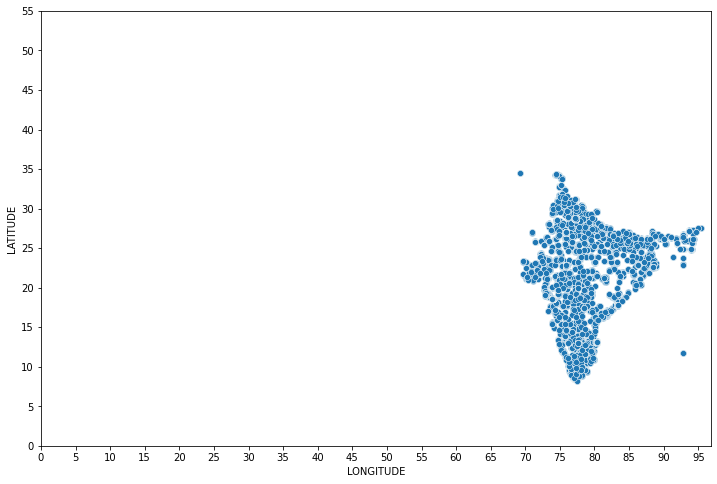

<Figure size 432x288 with 0 Axes>

In [58]:
#Device locations of the events data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = events_data['latitude'], x= events_data['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()
plt.savefig("Anamolies in Latitude Longitude.png")

### Distribution of users across India

In [1]:
events_data.groupby(['state'])['device_id'].nunique().sort_values(ascending=False).head(10)

NameError: name 'events_data' is not defined

**Rank according to population of states**

Rank	States	          
1	   Uttar Pradesh	
2	   Maharashtra	
3	   Bihar
4	   West Bengal
5	   Madhya Pradesh	
6	   Tamil Nadu	
7	   Rajasthan	
8	   Karnataka 
9	   Gujarat	
10	   Andhra Pradesh

**Observations**
- Though UttarPradesh is ranked high in population no of users using Insaid Telecom seems to be less
- Same with states of Bihar ,AndhraPradesh,Gujarath

In [ ]:
events_data.groupby(['state'])['device_id'].nunique().sort_values(ascending=False).head(10)

In [22]:
latitude_modes = events_data.groupby(['state','city'])['latitude'].transform(lambda x: x.mode()[0])
longitude_modes= events_data.groupby(['city','device_id'])['longitude'].transform(lambda x: x.mode()[0])                                   
events_data.loc[((events_data['latitude'])>38),'latitude']=latitude_modes
events_data.loc[((events_data['longitude'])<69),'longitude']=longitude_modes

In [23]:
events_data.loc[((events_data['latitude'])>38)|((events_data['latitude'])<8)]

,event_id,device_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hours,Min


In [24]:
events_data.loc[((events_data['longitude'])>98)|((events_data['longitude'])<69)]

,event_id,device_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hours,Min


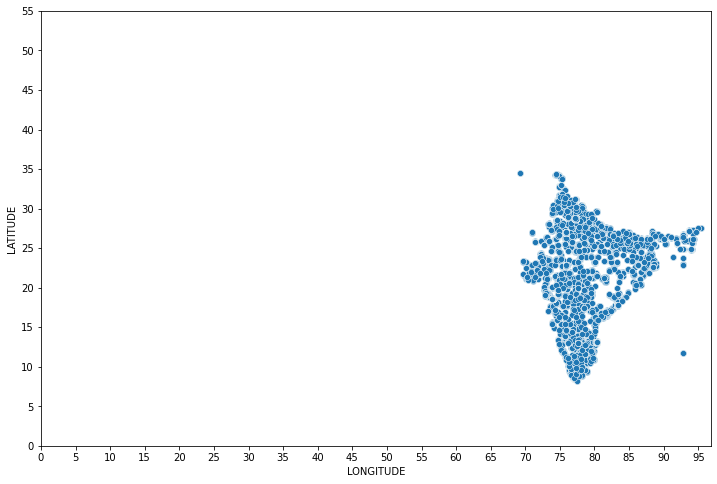

In [25]:
#Device locations of the events data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = events_data['latitude'], x= events_data['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()

###  Merging of all dataframes using inner join on device_id

In [26]:
device_event=pd.merge(events_data, phone_brand, on = "device_id", how = "inner")
tel_data=pd.merge(device_event, gender_age, on = "device_id", how = "inner")

In [27]:
#for group 1004 states to focus on
states_focus=['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh']

In [28]:
events_state=tel_data[tel_data['state'].isin(states_focus)]

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [29]:
events_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 3930 to 3252931
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      329172 non-null  int64         
 1   device_id     329172 non-null  float64       
 2   timestamp     329172 non-null  object        
 3   longitude     329172 non-null  float64       
 4   latitude      329172 non-null  float64       
 5   city          329172 non-null  object        
 6   state         329172 non-null  object        
 7   Time_stamp    329172 non-null  datetime64[ns]
 8   Date          329172 non-null  object        
 9   Hours         329172 non-null  int64         
 10  Min           329172 non-null  int64         
 11  phone_brand   329172 non-null  object        
 12  device_model  329172 non-null  object        
 13  gender        329172 non-null  object        
 14  age           329172 non-null  int64         
 15  group        

In [30]:
events_state.groupby(['device_id','group']).nunique().reset_index()


,device_id,group,event_id,timestamp,longitude,latitude,city,state,Time_stamp,Date,Hours,Min,phone_brand,device_model,gender,age
0,-9.222173e+18,F43+,20,20,1,1,1,1,20,7,11,18,1,1,1,1
1,-9.215269e+18,M39+,53,53,1,1,1,1,53,7,16,35,1,1,1,1
2,-9.213181e+18,M32-38,2,2,1,1,1,1,2,1,1,2,1,1,1,1
3,-9.211311e+18,M23-26,89,88,1,1,1,1,88,7,21,47,1,1,1,1
4,-9.206856e+18,M32-38,156,156,1,1,1,1,156,8,24,48,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,9.216831e+18,M39+,44,43,1,1,1,1,43,7,14,27,1,1,1,1
5219,9.217997e+18,M29-31,2,2,1,1,1,1,2,1,1,2,1,1,1,1
5220,9.219480e+18,F27-28,2,2,1,1,1,1,2,1,1,1,1,1,1,1
5221,9.219926e+18,M23-26,41,41,2,2,1,1,41,1,9,28,1,1,1,1


**observations on final data frame focusing on the given states**
- No more null values in the features
- Total number of observations are 329172
- Number of unique device_id's 5223

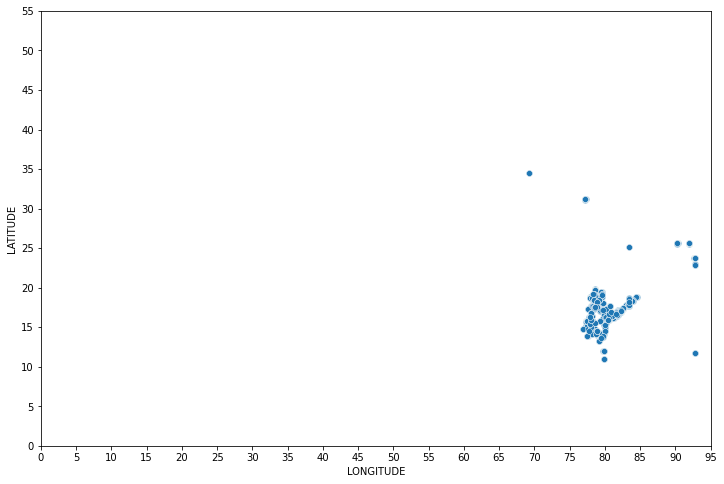

In [31]:
#Device locations of the events data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = events_state['latitude'], x= events_state['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

<b>1. Distribution of Customers State-wise.

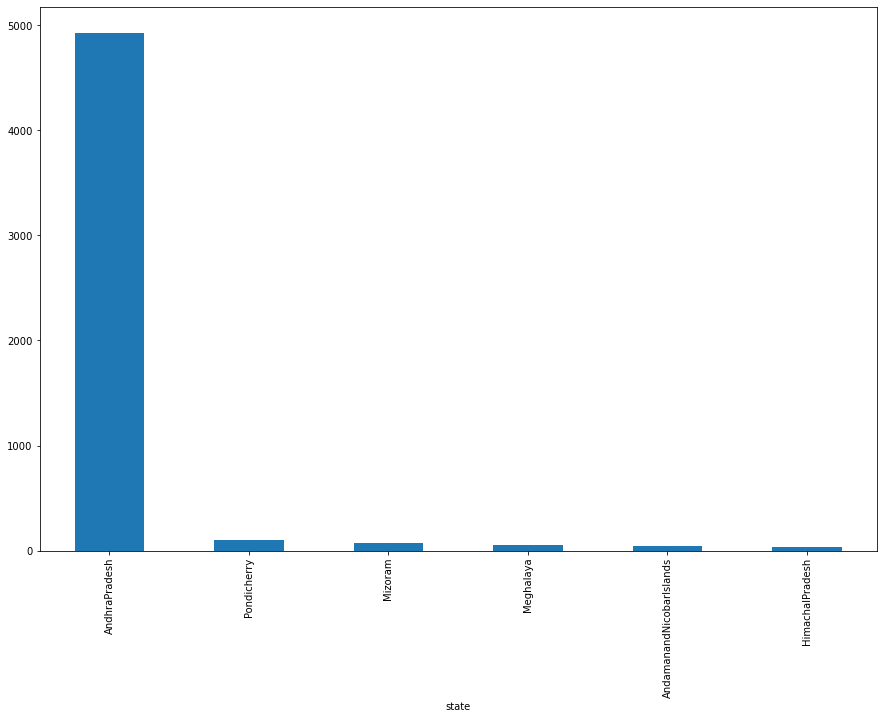

In [32]:
events_state.groupby(['state'])['device_id'].nunique().sort_values(ascending=False).plot(kind='bar',figsize=(15,10))

plt.savefig('Distribution of Customers State-wise.png')
plt.show()

**Observation**<br>
<b>AndhraPradesh has maximum number of devices</b>

<b>2. Distribution of Brand of Mobile Phones among Customers</b>

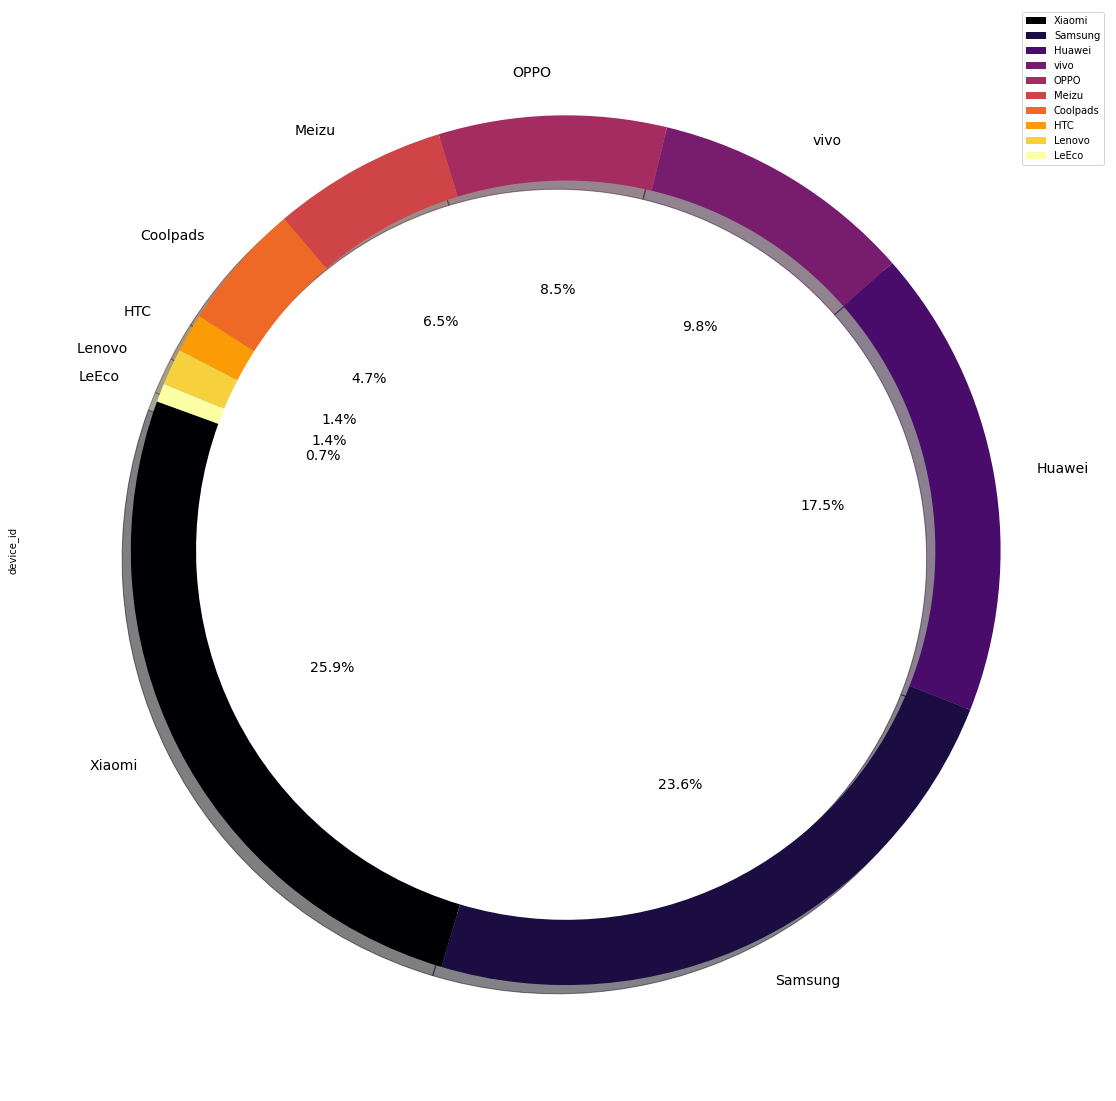

In [33]:
import numpy as np
space = np.ones(11)/10
events_state.groupby(['phone_brand'])['device_id'].nunique().sort_values(ascending=False).head(10).plot(kind='pie',  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(20,20), cmap='inferno', legend=True)
plt.savefig( 'Distribution of Brand of Mobile Phones among Customers')

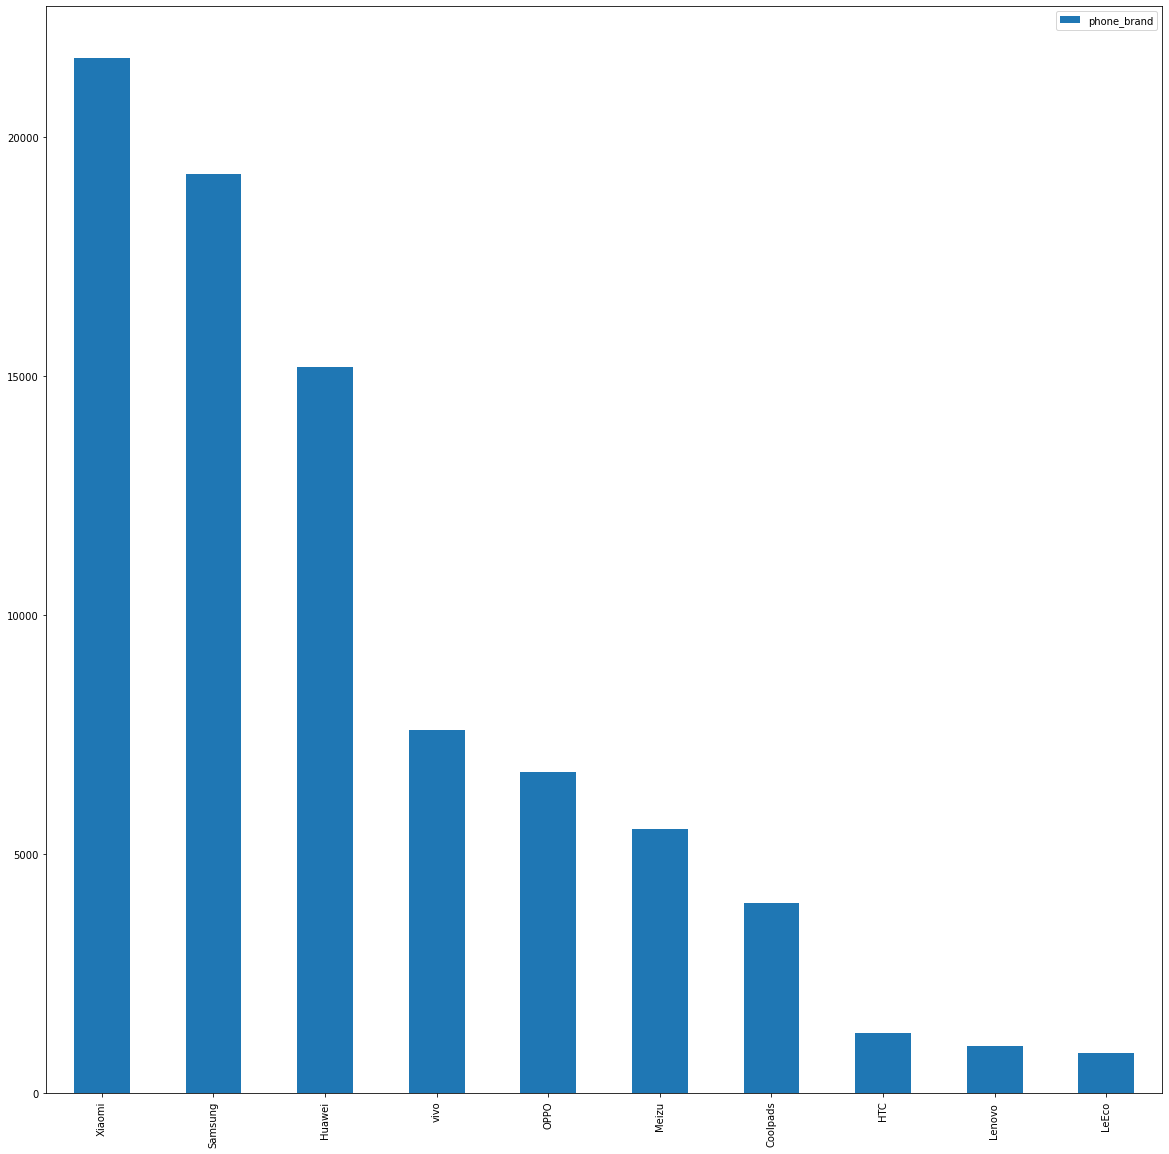

In [34]:

phone_brand['phone_brand'].value_counts().head(10).plot(kind='bar', figsize=(20,20), legend=True)
plt.savefig('Top 5  used brands.png')

<b>Top 5 brands are:</b>
<ol>
    <li>Xiaomi</li>
    <li>Samsung</li>
    <li>Huawei</li>
    <li>Vivo</li>
    <li>OPPO</li>
</ol>

<b>3.Gender based distribution of Users for each state </b>

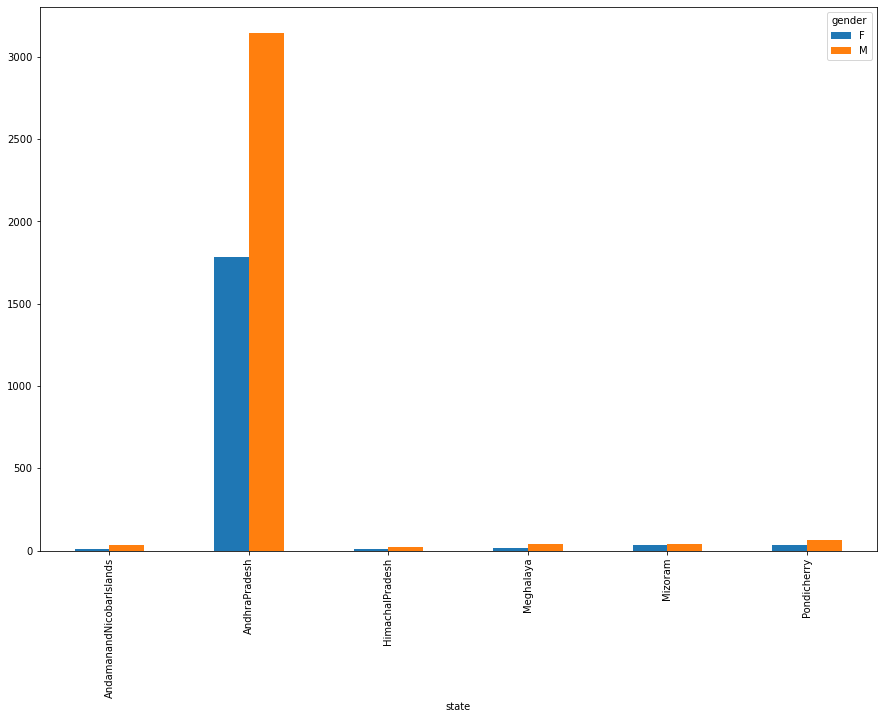

In [35]:


events_state.groupby(['state','gender'])['device_id'].nunique().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(15,10))
plt.savefig('Gender based distribution of Users for each state')
plt.show()

<b>There are more Male users than Females</b>

<b>4. Gender wise distribution of users for top 5 brand<b>

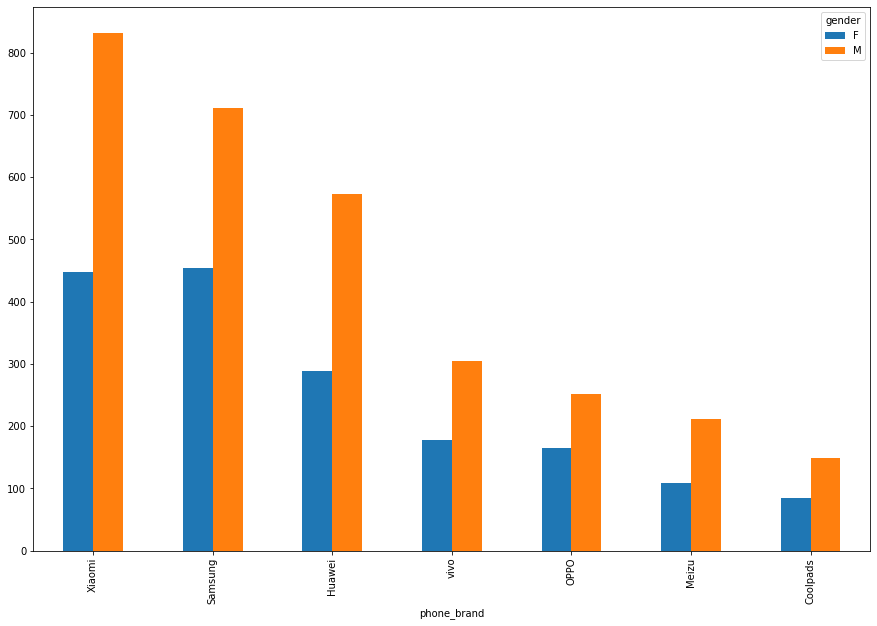

In [36]:


events_state.groupby(['phone_brand','gender'])['device_id'].nunique().sort_values(ascending=False).head(14).unstack().plot(kind='bar',figsize=(15,10))
plt.savefig(' Gender wise distribution of users for top 5 brand.png')

**Observation**
- In Males users, Xiaomi is most preferred than Samsung and Huawei 
- In Females users, Samsung and Xiaomi are equally popular

<b>5. Distribution of different Age Groups </b>

In [37]:
events_state[events_state.gender=='M'].group.unique()

array(['M29-31', 'M32-38', 'M39+', 'M23-26', 'M22-', 'M27-28'],
      dtype=object)

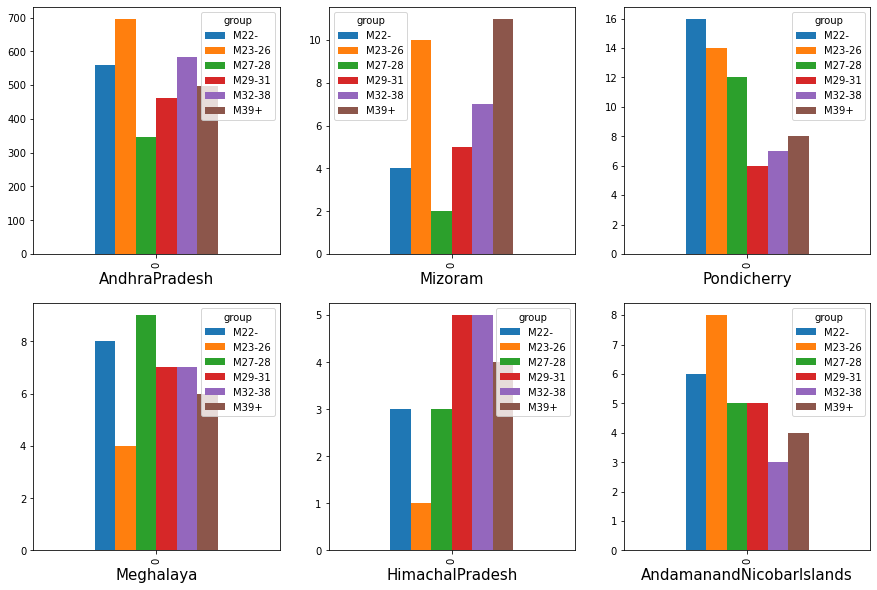

In [38]:
state_l=events_state.state.unique()
fig,ax=  plt.subplots(nrows=2,ncols=3, sharex=False, sharey= False, figsize=(24,16)) 
ax = ax.flatten()
ind=[0,1,2,3,4,5]
   
for s,i in  zip(state_l,ind) :
    events_state[(events_state.state==s)&(events_state.gender=='M')].groupby(['state','group'])['device_id'].nunique().sort_values(ascending=False).head(10).unstack().plot(kind='bar',figsize=(15,10),ax=ax[i],use_index=False)
    ax[i].set_xlabel(s, fontsize=15)
    plt.savefig('Distribution of different Age Groups of Males for each state.png')
plt.show()  

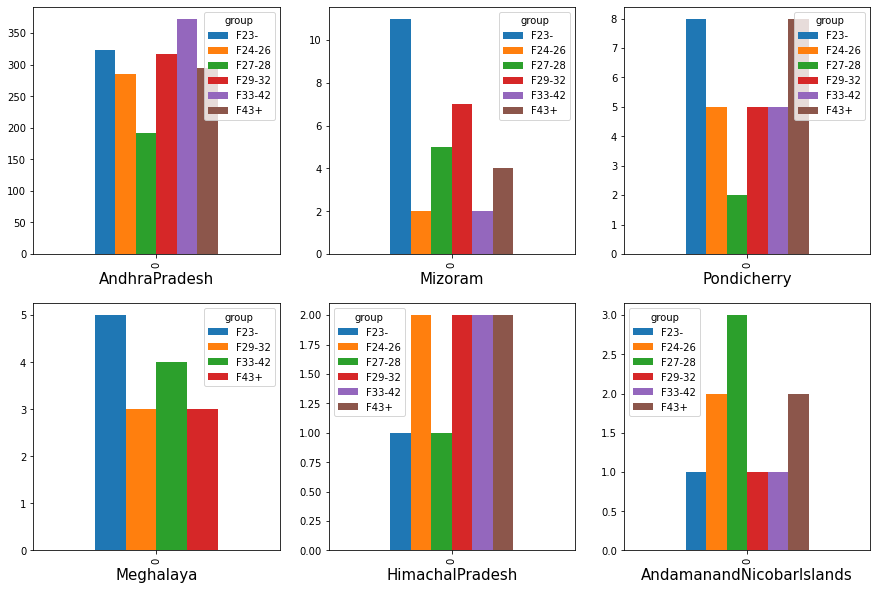

<Figure size 432x288 with 0 Axes>

In [39]:
state_l=events_state.state.unique()
fig,ax=  plt.subplots(nrows=2,ncols=3, sharex=False, sharey= False, figsize=(24,16)) 
ax = ax.flatten()
ind=[0,1,2,3,4,5]
   
for s,i in  zip(state_l,ind) :
    events_state[(events_state.state==s)&(events_state.gender=='F')].groupby(['state','group'])['device_id'].nunique().sort_values(ascending=False).head(10).unstack().plot(kind='bar',figsize=(15,10),ax=ax[i],use_index=False)
    ax[i].set_xlabel(s, fontsize=15)
    
plt.show() 
plt.savefig('Distribution of different Age Groups of Females for each state.png')

**Observation**

| SNO | State | AgeGroup(Highest Female Users)  | AgeGroup(Highest Male Users) 
| :-- | :--| :--| :--|
|01| **Andhrapradesh**   |   33to42 |23to26 |
|02| **Mizoram** | below 23| 39+ |
|03| **Pondicherry** |  below 23 and 33-42 | below 22 |
|04| **Meghalaya** |below 23 | 27-28 |
|05| **Himachal Pradesh** | 24 to 42 |  29-38 |
|06| **Andaman And Nicobar** | 22 to 28| 23-26 |

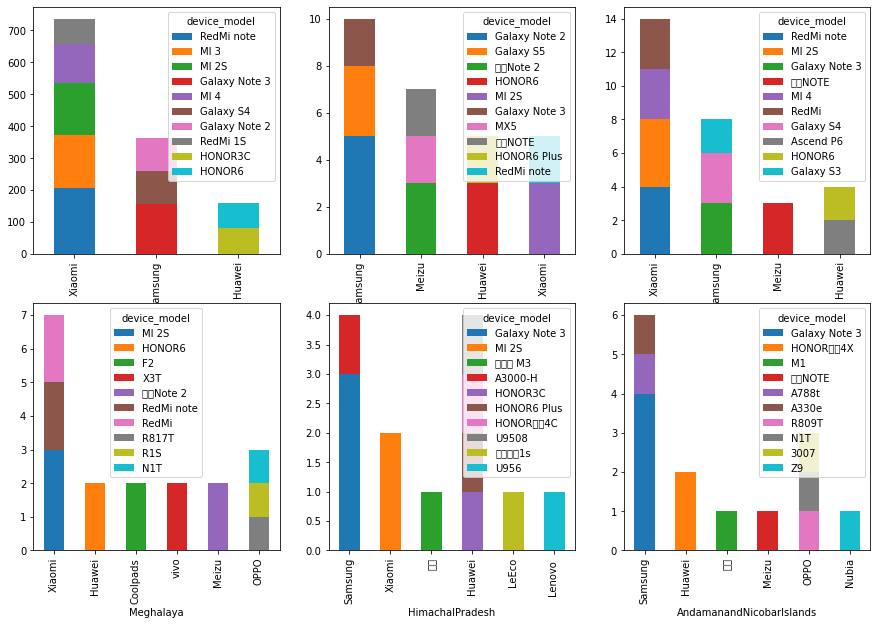

In [42]:
state_l=events_state.state.unique()
fig,ax=  plt.subplots(nrows=2,ncols=3, sharex=False, sharey= False, figsize=(24,16)) 
ax = ax.flatten()
ind=[0,1,2,3,4,5]
   
for s,i in  zip(state_l,ind) :
    events_state[(events_state.state==s)].groupby(['phone_brand','device_model'])['device_id'].nunique().sort_values(ascending=False).head(10).unstack().plot(kind='bar',figsize=(15,10),ax=ax[i],use_index=True,stacked=True)
    ax[i].set_xlabel(s, fontsize=10)
plt.savefig('State wise Distribution of models for Top brands.png')    
plt.show() 


<b>6. State wise Distribution of models for each brand </b>

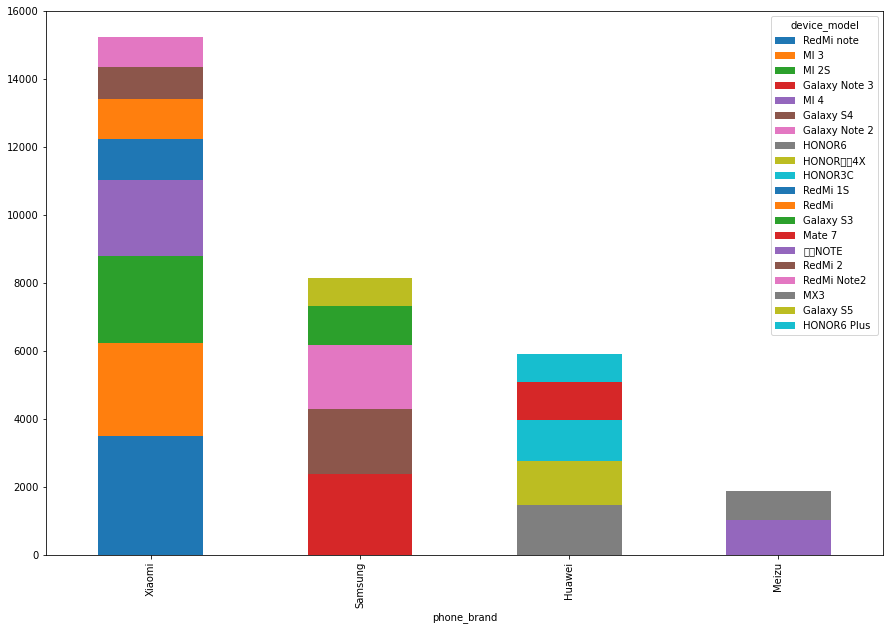

In [43]:
phone_brand.groupby(['phone_brand','device_model'])['device_id'].nunique().sort_values(ascending=False).head(20).unstack().plot(kind='bar',figsize=(15,10),use_index=True,stacked=True)
plt.savefig(' Models of the highest used mobile brands.png')

<b> 7. Peak device usage by hour of the day </b>

In [ ]:
events_state.info()

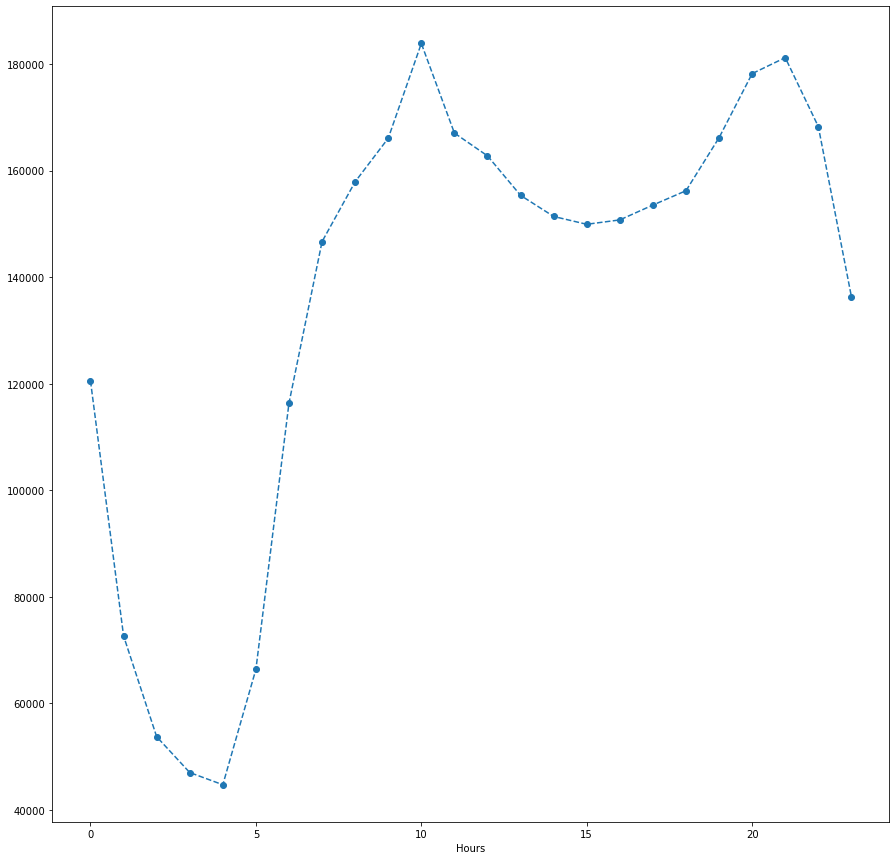

In [45]:
events_data.groupby(events_data['Hours'])['event_id'].count().plot(kind='line',figsize=(15,15),linestyle='--', marker='o')
plt.savefig('Hourly usage of devices for the whole data.png')
plt.show()

**Observation**

- Highest usage of devices are at 10 hours and 20 hours
- Lowest usage of devices is at 3 hours

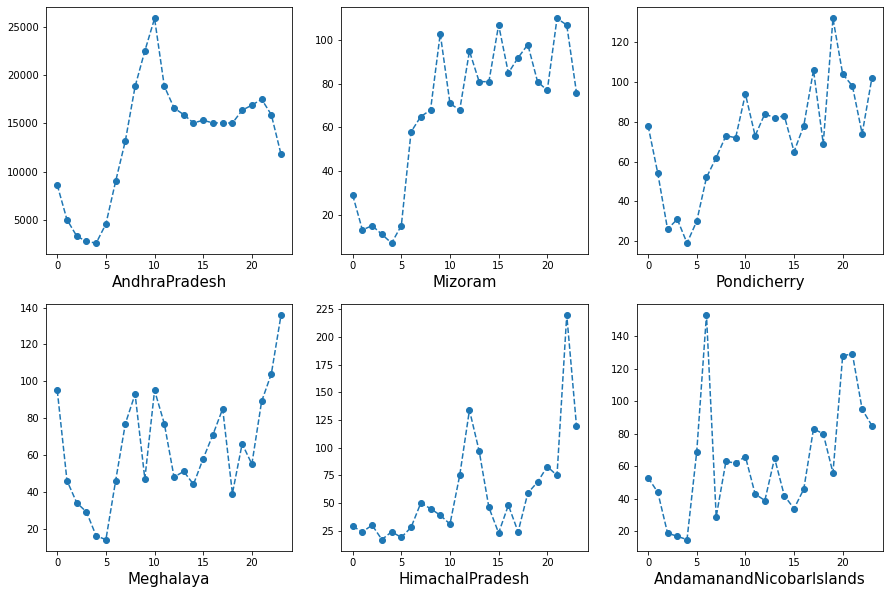

In [46]:
state_l=events_state.state.unique()
fig,ax=  plt.subplots(nrows=2,ncols=3, sharex=False, sharey= False, figsize=(24,16)) 
ax = ax.flatten()
ind=[0,1,2,3,4,5]
   
for s,i in  zip(state_l,ind) :
    events_state[(events_state['state'])==s].groupby(['Hours'])['event_id'].count().plot(kind='line',figsize=(15,10),ax=ax[i],linestyle='--', marker='o',use_index=True,legend=False)
    ax[i].set_xlabel(s, fontsize=15)
plt.savefig('Hourly usage of Devices for each state.png')    
plt.show() 


**Observation**


| SNO | State | Peak Usage Hour  | lowest Usaage Hour|
| :-- | :--| :--| :--|
|01| **Andhrapradesh**   | 10  | 5|
|02| **Mizoram** | 20| 3 |
|03| **Pondicherry** | 17 |3|
|04| **Meghalaya** |23| 5 |
|05| **Himachal Pradesh** | 22 | 3 |
|06| **Andaman And Nicobar** | 6| 4 |

In [ ]:
phone_brand['device_model'].value_counts().head(20)

---
<a name = Section9></a>
# **9. Summarization**
---

- AndhraPradesh has more number of device
- Number of Male user are more compare to Female users in all the states
- In the state Himachal Pradesh and Andaman and Nicobar users for the mobiles are in the same age group of 23 to 32 and 22 to28 respc
- Whereas there is a huge variation of mobile usage between male and female in state   Mizoram,AndhraPrasedh,Meghalaya,Pondicherry
- Xiomi,Samsung are top selling brands 
- Redmi  ,Galaxy models from Xiomi,samsung are the most used models
- Peak usaage of devices is observed at 10 and 20 hours
- Low usage of devices is observed at 3


<a name = Section91></a>
### **9.1 Conclusion**

- Xiaomi has captured Maximum Market, main reason can be they are cheaper than Samsung
- Samsung always spend a lot of money for Research and Development  
- So, they are not able to sell their phone in a cheap budget,like Xiaomi
- The Chinese brand Xiaomi makes awesome configuration smartphones in a low cheap price
- Xiaomi really understands the demand of the Indian people. 
- They understand that the Indian people always want smartphone with fast Qualcomm Snapdragon Octa core processor, a long lasting battery life and awesome camera in a low mid rangen price segment.
- One specific feature which separates Redmi from the other brands is their IR blaster sensor
- Samsung and Huawei are making their way to become top but if Samsung wants to beat Xiaomi, it needs to find a way to reduce cost
- Brands like OPPO and Vivo need to come up with a unique technology at the same time sell at a comparable price as Xiaomi to capture more customers 
- All brands must target age group 31 to 40 which has maximum users
- Though UttarPradesh is ranked high in population no of users using Insaid Telecom seems to be less
- Same with states of Bihar ,AndhraPradesh,Gujarath

<a name = Section92></a>
### **9.2 Actionable Insights**

- Samsung must reduce cost to sell at a comparable rate with Xiaomi
- Brands must try to understand Indian people demand like Xiaomi has done
- Most important features needed are:
    1. Qualcomm Snapdragon Octa core processor
    2. Long lasting battery life
    3. Awesome camera in a low mid range price segment
- One specific feature which separates Redmi from the other brands is their IR blaster sensor
- All brands must target age group 31 to 40 which has maximum users
- Based on population statistics , Insaid Telecom has lot of Users market in Bihar, AndhraPradesh, Gujarat
- Increasing the mobile connectivity during peak hours can increase users
- Partnering with Brands Xiomi and Samsung will increase the chances of users opting for Insaid Telecom services
- There is huge market for Female users, by giving discounts and incentives to Female user would help to expanding the business
- Though AndhraPradesh has extensive Insaid Telcom coveragr, setting up service in Mizoram can expand the reach of Insaid Network
